# Famous Last Words
The dataset documents Texas death row inmates executed from 1976, when the Supreme Court reinstated the death penalty, to the present. It was extracted from the Texas Department of Criminal Justice website.

Source: https://selectstarsql.com/frontmatter.html#dataset

In [62]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re

matplotlib.rcParams['pdf.fonttype'] = 42 #makes text editable in illustrator

%matplotlib inline

In [63]:
df = pd.read_csv("tx_deathrow_full.csv")

In [68]:
df.head()

,Execution,Date of Birth,Date of Offence,Highest Education Level,Last Name,First Name,TDCJ Number,Age at Execution,Date Received,Execution Date,Race,County,Eye Color,Weight,Height,Native County,Native State,Last Statement,Full Name,Year
0,553,1983-09-24,2004-11-21,9.0,Young,Christopher Anthony,999508,34,2006-03-31,2018-07-17,Black,Bexar,Brown,216.0,"6' 1""",Bexar,Texas,l want to make sure the Patel family knows I l...,Christopher Anthony Young,2018
1,552,1951-08-28,1979-05-27,12.0,Bible,Danny Paul,999455,66,2003-07-17,2018-06-27,White,Harris,Blue,194.0,"5' 7""",Brazoria,Texas,NaN,Danny Paul Bible,2018
2,551,1981-04-03,2003-12-03,10.0,Castillo,Juan Edward,999502,37,2005-09-27,2018-05-16,Hispanic,Bexar,Brown,180.0,"5' 11""",Bexar,Texas,To everyone that has been there for me you kno...,Juan Edward Castillo,2018
3,550,1987-04-04,2008-04-06,11.0,Davila,Erick Daniel,999545,31,2009-02-27,2018-04-25,Black,Tarrant,Brown,161.0,"5' 11""",Tarrant,Texas,"Yes, I would like to say nephew it burns huh. ...",Erick Daniel Davila,2018
4,549,1980-03-26,2005-09-13,12.0,Rodriguez III,Rosendo,999534,38,2008-05-14,2018-03-27,Hispanic,Lubbock,Brown,198.0,"5' 8""",Wichita,Texas,First I would like to say I have been here sin...,Rosendo Rodriguez III,2018


In [69]:
df.dtypes

Execution                    int64
Date of Birth               object
Date of Offence             object
Highest Education Level    float64
Last Name                   object
First Name                  object
TDCJ\nNumber                 int64
Age at Execution             int64
Date Received               object
Execution Date              object
Race                        object
County                      object
Eye Color                   object
Weight                     float64
Height                      object
Native County               object
Native State                object
Last Statement              object
Full Name                   object
Year                         int64
dtype: object

## Youngest Inmates Executed

In [66]:
df["Full Name"] = df['First Name'] + " " + df['Last Name']

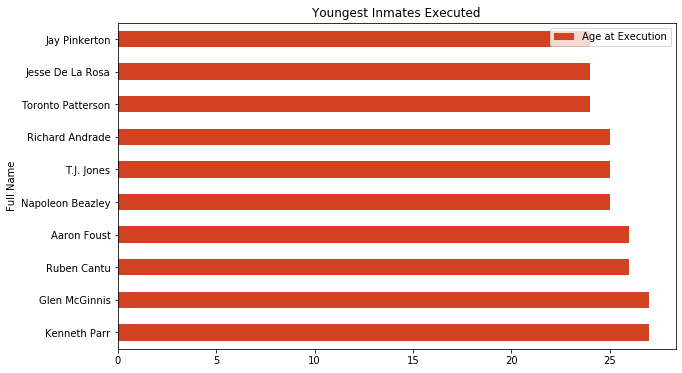

In [42]:
young = df.sort_values(by='Age at Execution', ascending=True).head(10)
young.sort_values(by='Age at Execution', ascending=False).plot(x='Full Name', 
                                                               y='Age at Execution', 
                                                               kind='barh', 
                                                               figsize=(10, 6),
                                                               title="Youngest Inmates Executed",
                                                               color="#D34123")

## Year with the most executions


In [67]:
#Make a year only column
df['Year'] = df['Execution Date'].str.replace('(-.*)', '', regex = True).astype(int)

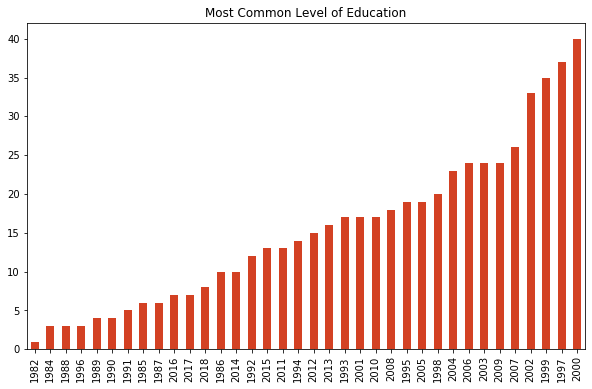

In [73]:
df['Year'].value_counts(ascending=True).plot(kind='bar', 
                                                  figsize=(10, 6),
                                                  title="Most Common Level of Education",
                                                  color="#D34123")

In [77]:
df['Year'].value_counts()

2000    40
1997    37
1999    35
2002    33
2007    26
2009    24
2003    24
2006    24
2004    23
1998    20
2005    19
1995    19
2008    18
2010    17
2001    17
1993    17
2013    16
2012    15
1994    14
2011    13
2015    13
1992    12
2014    10
1986    10
2018     8
2017     7
2016     7
1987     6
1985     6
1991     5
1990     4
1989     4
1996     3
1988     3
1984     3
1982     1
Name: Year, dtype: int64

## Executions by race (Make into a pie chart)


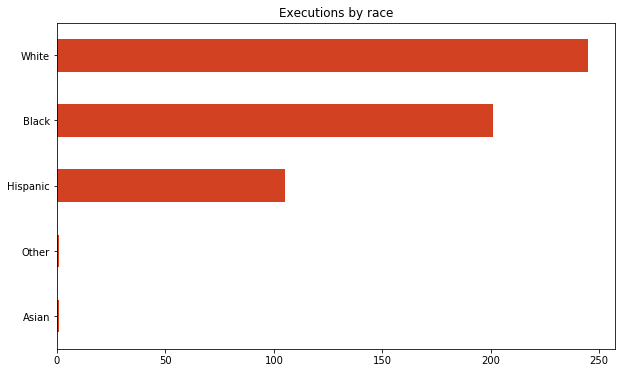

In [50]:
df['Race'].value_counts(ascending=True).plot(kind='barh',
                                             figsize=(10, 6),
                                             title="Executions by race",
                                             color="#D34123")

## Most common level of education


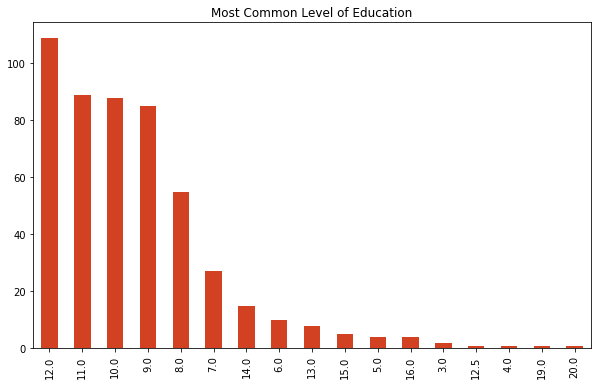

In [48]:
df['Highest Education Level'].value_counts().plot(kind='bar', 
                                                  figsize=(10, 6),
                                                  title="Most Common Level of Education",
                                                  color="#D34123")

## Most common last words

## Which county in Texas has the most death row inmates


In [57]:
texas = df[df['Native State'] == 'Texas']
texas['Native County'].value_counts()

Harris           74
Dallas           43
Bexar            30
Tarrant          26
Jefferson        10
Nueces            7
McLennan          6
Travis            6
Potter            6
Hidalgo           5
Brazos            5
Lubbock           5
El Paso           4
Cameron           4
Smith             4
Wichita           3
Williamson        3
Lamar             3
Galveston         3
Gregg             3
Wharton           2
Bell              2
Leon              2
Tom Green         2
Navarro           2
Marion            2
Anderson          2
Grimes            2
Nacoqdoches       2
Hunt              2
                 ..
Nueces County     1
Bastrop           1
Wise              1
Hildago           1
Haskell           1
Harris County     1
Hopkins           1
Terrell           1
Colin             1
Childress         1
Kleburg           1
Harrison          1
Angelina          1
Webb              1
Bailey            1
Hunt County       1
Wilbarger         1
Dawson            1
Howard            1
